In [181]:
from NeuralNetwork import NeuralNetwork as nn
import numpy as np
import matplotlib.pyplot as plt
import gzip

<h3>Importing the MNIST dataset</h3>

In [3]:
def load_mnist_images(file):
    with gzip.open(file,'rb') as f:
        f.read(16)
        data=np.frombuffer(f.read(),dtype=np.uint8)
        return data.reshape(-1,28,28)
        

def load_mnist_labels(file):
    with gzip.open(file,'rb') as f:
        f.read(8)
        labels=np.frombuffer(f.read(),dtype=np.uint8)
        #OneHotEncoding labels because my NN assumes y to be encoded.
        labels_onehotencoding=np.eye(np.max(labels)+1)[labels]
        return labels_onehotencoding

x_train=load_mnist_images('C:\\Users\\LENOVO\\OneDrive\\Desktop\\Python\\NeuralNetwork\\MNIST\\raw\\train-images-idx3-ubyte.gz').reshape(-1,28*28)
y_train=load_mnist_labels('C:\\Users\\LENOVO\\OneDrive\\Desktop\\Python\\NeuralNetwork\\MNIST\\raw\\train-labels-idx1-ubyte.gz')
x_test=load_mnist_images('C:\\Users\\LENOVO\\OneDrive\\Desktop\\Python\\NeuralNetwork\\MNIST\\raw\\t10k-images-idx3-ubyte.gz').reshape(-1,28*28)
y_test=load_mnist_labels('C:\\Users\\LENOVO\\OneDrive\\Desktop\\Python\\NeuralNetwork\\MNIST\\raw\\t10k-labels-idx1-ubyte.gz')


<h3>Creating Batches & Shuffling</h3>

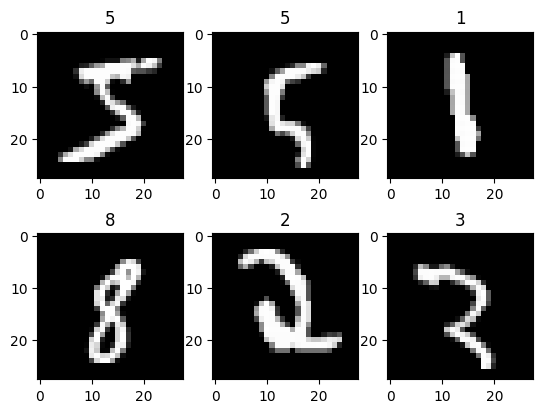

In [66]:
batchesize=100
x_train_batches=np.array_split(x_train,len(x_train)//batchesize)
y_train_batches=np.array_split(y_train,len(y_train)//batchesize)
x_test_batches=np.array_split(x_test,len(x_test)//batchesize)
y_test_batches=np.array_split(y_test,len(y_test)//batchesize)

trainloader=list(zip(x_train_batches,y_train_batches))
testloader=list(zip(x_test_batches,y_test_batches))

np.random.shuffle(trainloader)
np.random.shuffle(testloader)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train_batches[i][0].reshape(28, 28), cmap="gray")
    plt.title(np.argmax(y_train_batches[i][0],axis=0))
plt.show()

In [75]:
class model:
    def __init__(self,hiddenlayer,features,classes):
        self.l1=nn.Linear_layer(features,hiddenlayer) #1st neural layer with inputsize i.e features of x and neuron count as desired
        self.l2=nn.Linear_layer(hiddenlayer,classes) #2nd neural layer with input 

    def forward(self,x):
        out=self.l1.forward(x) #x has shape (samples x features)

        out=nn.activation.ReLU(out) #out has shape (neurons x samples)

        out=self.l2.forward(out.T) #transpose out because input should have shape (samples x features or neurons)

        return out #has shape (neurons x samples)

<h3>Training and Testing</h3>

In [179]:
_,features=x_train.shape
classes=10

hiddenlayer=50
neuralmodel=model(hiddenlayer,features,classes)

train_loss=nn.loss_functions()

learning_rate=0.001
optimizer=nn.gradient_descent(learning_rate)

num_epochs=15

def classes(y_pred,y):
    predicted_labels=np.argmax(y_pred,axis=0)
    labels=np.argmax(y,axis=1)
    return predicted_labels,labels

In [180]:
train_accuracy_per_epoch=[]
test_accuracy_per_epoch=[]
for epoch in range(num_epochs):
    train_correct=0
    test_correct=0
    for i,(images,labels) in enumerate(trainloader):
        y_predicted=neuralmodel.forward(images)
        lossvalue=train_loss.CrossEntropyLoss(y_predicted,labels)
        optimizer.step(neuralmodel,train_loss)

        predicted_labels,true_labels=classes(y_predicted,labels)
        #no need to softmax y_predicted because softmax preserves the order and np.argmax will return indice of highest value 

        train_correct+=np.sum(predicted_labels==true_labels)
        
        if epoch%5==0 and i%599==0:
            # print(f'predicted_labels:{predicted_labels}\nlabels:{labels}')
            print(f'Epoch: [{epoch+1}/{num_epochs}], Step: [{i+1}/{len(x_train_batches)}], Loss: {lossvalue:.4f}')

    for i,(images,labels) in enumerate(testloader):
        y_predicted=neuralmodel.forward(images)

        predicted_labels,true_labels=classes(y_predicted,labels) 
        #no need to softmax y_predicted because softmax preserves the order and np.argmax will return indice of highest value 

        test_correct+=np.sum(predicted_labels==true_labels)

    train_accuracy_per_epoch.append(train_correct/len(x_train) *100)
    test_accuracy_per_epoch.append(test_correct/len(x_test)*100)
print(f'Training Accuracy: {train_accuracy_per_epoch[-1]}\nTesting Accuracy: {test_accuracy_per_epoch[-1]}')
        

Epoch: [1/15], Step: [1/600], Loss: 18.6787
Epoch: [1/15], Step: [600/600], Loss: 0.6446
Epoch: [6/15], Step: [1/600], Loss: 0.1125
Epoch: [6/15], Step: [600/600], Loss: 0.2107
Epoch: [11/15], Step: [1/600], Loss: 0.1016
Epoch: [11/15], Step: [600/600], Loss: 0.1388
Training Accuracy: 94.675
Testing Accuracy: 93.26


<h3>Visualization</h3>

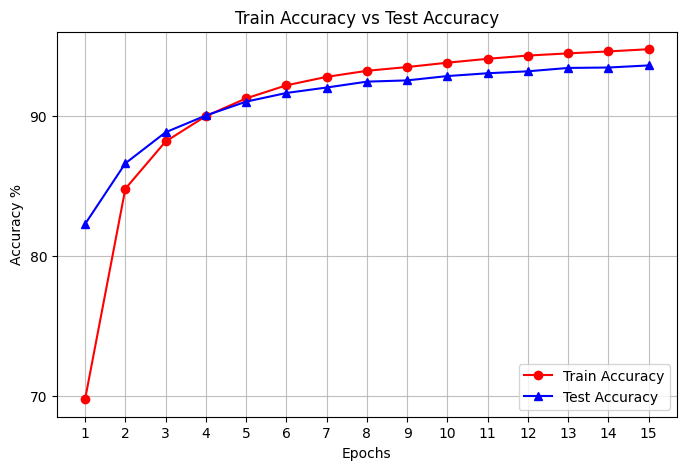

In [176]:
x=np.arange(1,num_epochs+1)
y1=train_accuracy_per_epoch
y2=test_accuracy_per_epoch
plt.figure(figsize=(8, 5))
plt.xlabel('Epochs')
plt.ylabel('Accuracy %')
plt.title('Train Accuracy vs Test Accuracy')

plt.xticks(np.arange(1,num_epochs+1,1))
plt.yticks(np.arange(0,101,10))

plt.plot(x,y1,marker='o',color='red',linestyle='-',label='Train Accuracy')
plt.plot(x,y2,marker='^',color='blue',linestyle='-',label='Test Accuracy')
plt.legend(loc='lower right')
plt.grid(True,alpha=0.8)

plt.show()